## Genpact Hackathon - Food Delivery Order Forecasting - EDA & Feature Engg
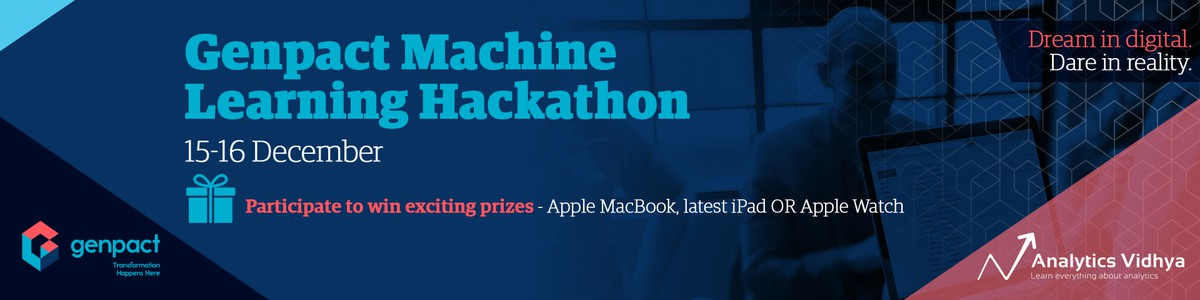

<B>Approach to EDA and Feature Engineering</B>
1. Treat missing data, if any. In the dataset provided, there was no missing value. Hence, skipped this step
2. Data Cleansing: Next we perform data cleansing. Only 1 field center type required cleansing - Removed 'Type_' from the field values
3. Data Profiling: Nextwe do profiling of train and test data. This gives a summary of train and test data
4. EDA: I have performed minimal EDA since the focus was on model building. However, given some graphs to understand the data set
5. Combining test and train data: Combined test and train data so that feature engineeting can be done on unified data and splitting them at the end. 
6. Feature Engineering: This is the most crucial steps. I tried to do feature engineering based on count ofcategorical variable, taking combination of 2 or more categorical variables and grouping them together. Further, did some additional feature engineering.
7. Checking Correlation of features: Logically, I should have done this step and removed highly correlated variable. However, the hardware of my laptop was not uptp mark and creating headmap was not getting executed. Hence, skipped this step.

In [1]:
import os
import gc
os.chdir('D:/Shikhar/Coding/Hackathon/Genpact_ML_hackathon')
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import pandas_profiling

UsageError: Line magic function `%` not found.


In [ ]:
train_dataset = pd.read_csv ('Dataset/train.csv', low_memory = False)
fulfilment_center_dataset = pd.read_csv ('Dataset/fulfilment_center_info.csv', low_memory = False)
meal_info_dataset = pd.read_csv ('Dataset/meal_info.csv', low_memory = False)
test_dataset = pd.read_csv('Dataset/test.csv', low_memory = False)
train_dataset.head()

#### Missing Data

In [80]:
train_dataset.isnull().sum(), fulfilment_center_dataset.isnull().sum(), meal_info_dataset.isnull().sum()

(id                       0
 week                     0
 center_id                0
 meal_id                  0
 checkout_price           0
 base_price               0
 emailer_for_promotion    0
 homepage_featured        0
 num_orders               0
 dtype: int64, center_id      0
 city_code      0
 region_code    0
 center_type    0
 op_area        0
 dtype: int64, meal_id     0
 category    0
 cuisine     0
 dtype: int64)

Inference: The datasets do not have missing values. Hence, no need to treat missing data

#### Data Cleansing
1. Remove 'TYPE_' from fulfilment dataset, center_type column

In [81]:
fulfilment_center_dataset['center_type'] = fulfilment_center_dataset['center_type'].replace('TYPE_', '', regex = True)
fulfilment_center_dataset.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,A,3.7
1,13,590,56,B,6.7
2,124,590,56,C,4.0
3,66,648,34,A,4.1
4,94,632,34,C,3.6


In [82]:
train_Test_overlap = set(pd.unique(train_dataset.week)).intersection(set(pd.unique(test_dataset.week)))
print (len(train_Test_overlap) / len(test_dataset['week'].unique()) * 100)

0.0


In [83]:
#Let do profiling of the dataset
pfr = pandas_profiling.ProfileReport(train_dataset)
pfr.to_file("Genpact Training Data Profiling.html")
pfr

Number of variables,9
Number of observations,456548
Total Missing (%),0.0%
Total size in memory,31.3 MiB
Average record size in memory,72.0 B
Numeric,6
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,1


In [84]:
#Let do profiling of the dataset
pfr = pandas_profiling.ProfileReport(test_dataset)
pfr.to_file("Genpact Test Data Profiling.html")
pfr

Number of variables,8
Number of observations,32573
Total Missing (%),0.0%
Total size in memory,2.0 MiB
Average record size in memory,64.0 B
Numeric,5
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,1


#### Merge the dataasets

In [85]:
combined_dataset = pd.concat([train_dataset, test_dataset])
column_sequence = train_dataset.columns
combined_dataset = combined_dataset.reindex(columns = column_sequence)
combined_dataset.sample(5)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
108274,1335754,37,102,2290,311.43,310.43,0,0,203.0
28936,1088550,154,43,1207,370.54,370.54,0,0,NaN
357664,1292774,115,65,1247,445.23,446.23,0,0,69.0
106611,1190024,37,92,1109,259.02,258.02,0,0,150.0
327150,1020070,106,161,2826,309.43,310.43,0,0,109.0


In [86]:
combined_dataset = pd.merge(combined_dataset, fulfilment_center_dataset, on = 'center_id', how = 'left')
combined_dataset = pd.merge(combined_dataset, meal_info_dataset, on = 'meal_id', how = 'left')
combined_dataset.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,C,2.0,Beverages,Thai
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,56,C,2.0,Beverages,Indian
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,56,C,2.0,Beverages,Indian


### EDA

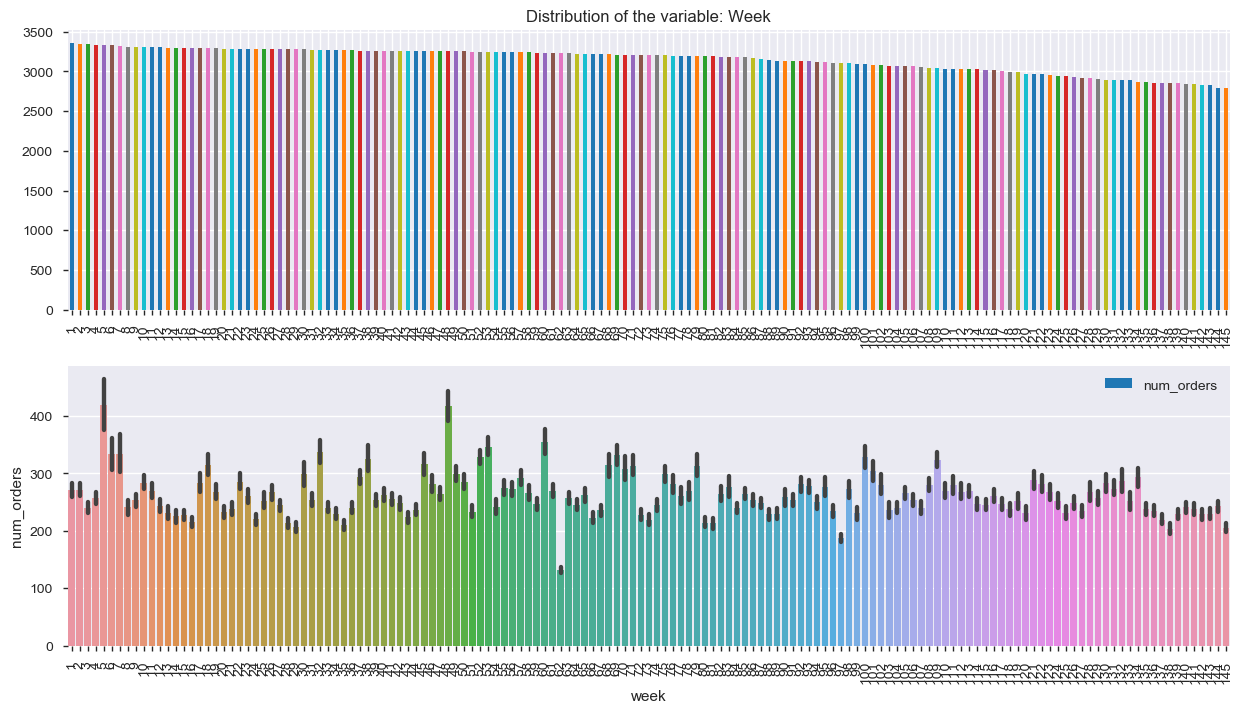

In [87]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15,8))

train_dataset.week.value_counts().plot.bar(ax=ax1)
ax1.set_xticklabels(train_dataset['week'].unique(), rotation=90)
ax1.set_title('Distribution of the variable: Week')

train_dataset[['week','num_orders']].groupby('week').mean().plot.bar(ax=ax2)
sns.barplot('week', 'num_orders', data = train_dataset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014CEBE10>,
      dtype=object)

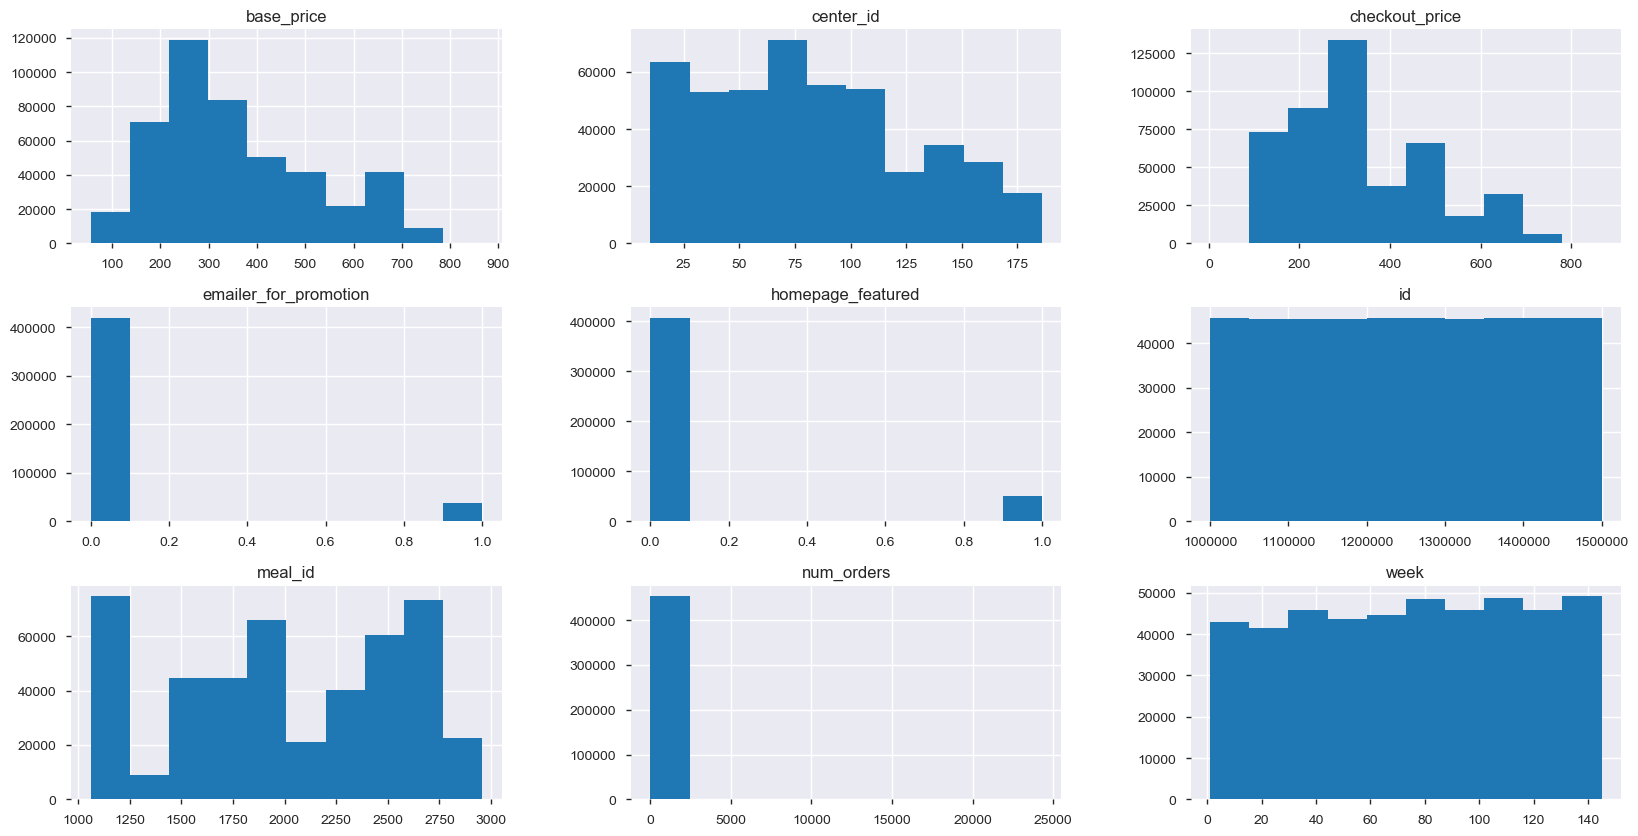

In [88]:
train_dataset[train_dataset.dtypes[(train_dataset.dtypes=="float64")|(train_dataset.dtypes=="int64")]\
              .index.values].hist(figsize=[20,10])

Text(0.5,1,'Distribution of the variable: homepage_featured')

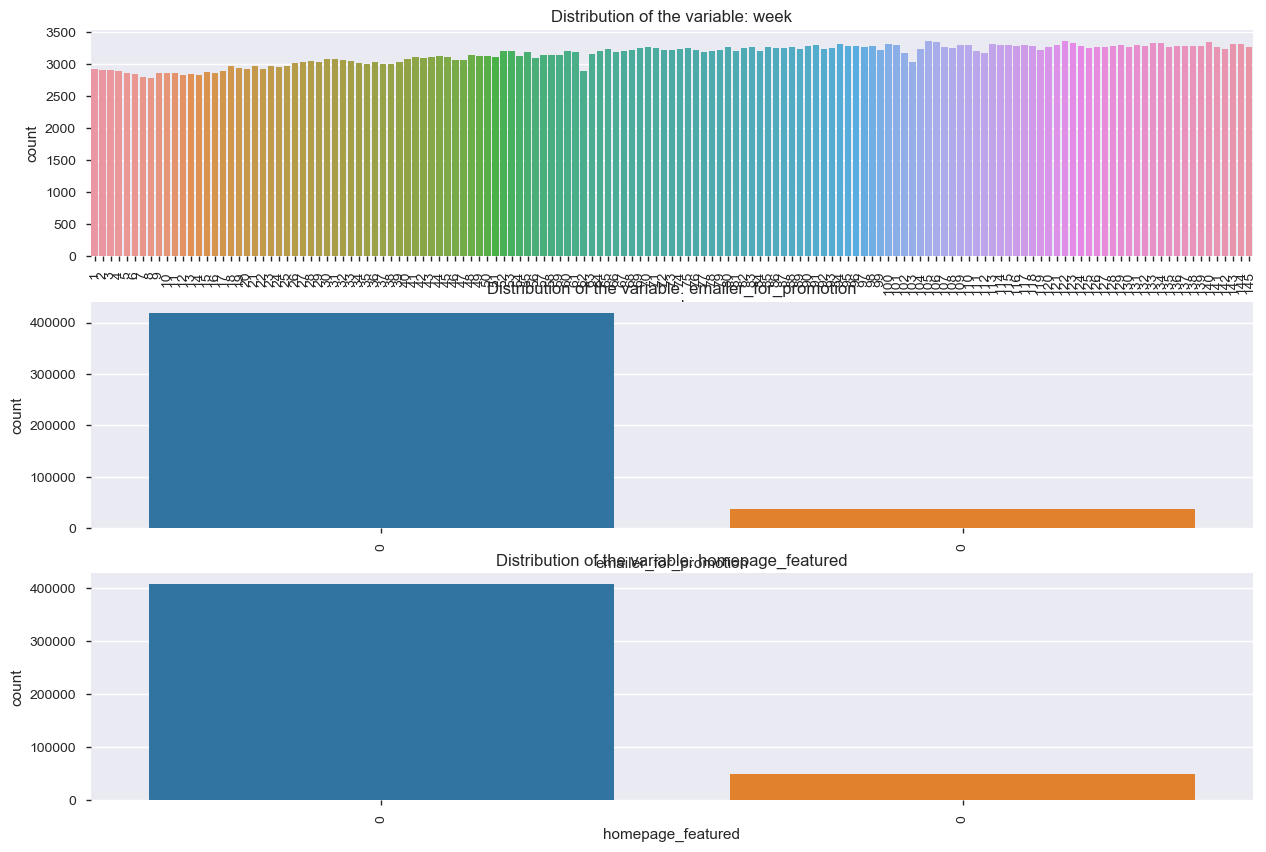

In [89]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(15,10))

sns.countplot(x="week", data = train_dataset, ax=ax1)
ax1.set_xticklabels(train_dataset['week'].unique(), rotation=90)
ax1.set_title('Distribution of the variable: week')

sns.countplot(x="emailer_for_promotion", data = train_dataset, ax=ax2)
ax2.set_xticklabels(train_dataset.emailer_for_promotion, rotation=90)
ax2.set_title('Distribution of the variable: emailer_for_promotion')


sns.countplot(x="homepage_featured", data = train_dataset, ax=ax3)
ax3.set_xticklabels(train_dataset.homepage_featured, rotation=90)
ax3.set_title('Distribution of the variable: homepage_featured')



#### Feature Engineering

In [90]:
#No of orders due to emails per meal ID
pct_orders_through_email_promotion = pd.DataFrame(train_dataset.groupby(['meal_id'])['num_orders'].sum()).reset_index()
num_orders_per_week = train_dataset.loc[(train_dataset.emailer_for_promotion == 1)][['meal_id', 'num_orders']].groupby('meal_id').\
        sum().rename(columns={'num_orders':'num_orders_through_email'}).reset_index()
pct_orders_through_email_promotion = pd.merge(pct_orders_through_email_promotion, num_orders_per_week, on = 'meal_id')
pct_orders_through_email_promotion['pct_num_orders_through_email_promotion'] = (pct_orders_through_email_promotion.\
        num_orders_through_email/pct_orders_through_email_promotion.num_orders)
pct_orders_through_email_promotion = pct_orders_through_email_promotion.drop(['num_orders', 'num_orders_through_email'], axis = 1)

combined_dataset = pd.merge(combined_dataset, pct_orders_through_email_promotion, on = 'meal_id', how = 'left')

In [91]:
#No of orders due to homepage featured per meal ID
pct_orders_through_homepage_featured = pd.DataFrame(train_dataset.groupby(['meal_id'])['num_orders'].sum()).reset_index()
homepage_featured_per_week = train_dataset.loc[(train_dataset.homepage_featured == 1)][['meal_id', 'num_orders']].groupby('meal_id').\
        sum().rename(columns={'num_orders':'num_orders_through_homepage_featured'}).reset_index()
pct_orders_through_homepage_featured = pd.merge(pct_orders_through_homepage_featured, homepage_featured_per_week, on = 'meal_id')
pct_orders_through_homepage_featured['pct_num_orders_through_homepage_featured'] = pct_orders_through_homepage_featured.\
        num_orders_through_homepage_featured/pct_orders_through_homepage_featured.num_orders
pct_orders_through_homepage_featured = pct_orders_through_homepage_featured.drop(['num_orders', 'num_orders_through_homepage_featured'], axis = 1)

combined_dataset = pd.merge(combined_dataset, pct_orders_through_homepage_featured, on = 'meal_id', how = 'left')
combined_dataset.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,pct_num_orders_through_email_promotion,pct_num_orders_through_homepage_featured
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,C,2.0,Beverages,Thai,0.046242,0.393389
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,C,2.0,Beverages,Thai,0.051965,0.421218
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,C,2.0,Beverages,Thai,0.049088,0.288403
3,1338232,1,55,2139,339.50,437.53,0,0,54.0,647,56,C,2.0,Beverages,Indian,NaN,0.011333
4,1448490,1,55,2631,243.50,242.50,0,0,40.0,647,56,C,2.0,Beverages,Indian,0.156490,0.191316


Lets calculate frequency, mean, max, median of each categorical variables

In [92]:
categorical_attributes_combination = [['center_id', 'meal_id'], ['center_id', 'city_code'], ['center_id','region_code'], ['center_id','center_type'], \
            ['center_id','category'],['center_id','cuisine'],
            ['meal_id', 'city_code'], ['meal_id','region_code'], ['meal_id','center_type'], ['meal_id','category'],['meal_id','cuisine'],
            ['city_code','region_code'], ['city_code','center_type'], ['city_code','category'],['city_code','cuisine'],
            ['region_code','center_type'], ['region_code','category'],['region_code','cuisine'],
            ['center_type','category'],['center_type','cuisine'], ['category','cuisine']
            ]

In [93]:
# Find frequency of is_attributed for each unique value in column
freqs = {}
for feature_name in categorical_attributes_combination:
    
    # New feature name
    new_feature = '_'.join(feature_name)+'_confRate'    
    
    # Perform the groupby
    grouped_dataset = combined_dataset.groupby(feature_name)
    
    # Group sizes    
    group_dataset_size = np.round(grouped_dataset.size(), 2)
    log_group = np.log(100000) # 1000 views -> 60% confidence, 100 views -> 40% confidence 
    print(">> Calculating confidence-weighted rate for: {}.\n   Saving to: {}. Group Max /Mean / Median / \
            Min: {} / {} / {} / {}".format(feature_name, new_feature, group_dataset_size.max(), np.round(group_dataset_size.\
            mean(), 2), np.round(group_dataset_size.median(), 2), group_dataset_size.min()))
    
    # Aggregation function
    def rate_calculation(x):
        """Calculate the attributed rate. Scale by confidence"""
        rate = x.sum() / float(x.count())
        conf = np.min([1, np.log(x.count()) / log_group])
        return np.round(rate * conf, 2)
    
    # Perform the merge
    combined_dataset = combined_dataset.merge(grouped_dataset['num_orders'].apply(rate_calculation).reset_index().rename(index = \
                    str, columns = {'num_orders': new_feature})[feature_name + [new_feature]], on=feature_name, how='left')
        
print(combined_dataset.shape)

>> Calculating confidence-weighted rate for: ['center_id', 'meal_id'].
   Saving to: center_id_meal_id_confRate. Group Max /Mean / Median /             Min: 155 / 135.87 / 150.0 / 1
>> Calculating confidence-weighted rate for: ['center_id', 'city_code'].
   Saving to: center_id_city_code_confRate. Group Max /Mean / Median /             Min: 7555 / 6352.22 / 6367.0 / 3712
>> Calculating confidence-weighted rate for: ['center_id', 'region_code'].
   Saving to: center_id_region_code_confRate. Group Max /Mean / Median /             Min: 7555 / 6352.22 / 6367.0 / 3712
>> Calculating confidence-weighted rate for: ['center_id', 'center_type'].
   Saving to: center_id_center_type_confRate. Group Max /Mean / Median /             Min: 7555 / 6352.22 / 6367.0 / 3712
>> Calculating confidence-weighted rate for: ['center_id', 'category'].
   Saving to: center_id_category_confRate. Group Max /Mean / Median /             Min: 1859 / 496.57 / 437.0 / 1
>> Calculating confidence-weighted rate for: ['ce

#### Binning the continuous variable - checkout price

In [94]:
#Let us do binning of checkout_price
price_bins = [0, 200, 400, 600, 800, 1000, 1200, 1400]
bin_labels = [0, 1, 2, 3, 4, 5, 6]
combined_dataset['price_bin'] = pd.cut(combined_dataset['checkout_price'], bins = price_bins, labels = bin_labels, right = True)

#### Rolling up all the categorical variables and find their count, mean, no of unique values, and cumulative count

In [95]:
# Define all the groupby transformations
GROUPBY_AGGREGATIONS = [
    # Variance in day, for user_id-prod-campaign_id
    {'groupby': ['week','center_id'], 'select': 'meal_id', 'agg': 'count'},
    {'groupby': ['week','center_id'], 'select': 'city_code', 'agg': 'count'},
    {'groupby': ['week','center_id'], 'select': 'region_code', 'agg': 'count'},
    {'groupby': ['week','center_id'], 'select': 'center_type', 'agg': 'count'},
    {'groupby': ['week','center_id'], 'select': 'category', 'agg': 'count'},
    {'groupby': ['week','center_id'], 'select': 'cuisine', 'agg': 'count'},
    {'groupby': ['center_id','meal_id'], 'select': 'city_code', 'agg': 'count'},
    {'groupby': ['center_id','meal_id'], 'select': 'region_code', 'agg': 'count'},
    {'groupby': ['center_id','meal_id'], 'select': 'center_type', 'agg': 'count'},
    {'groupby': ['center_id','meal_id'], 'select': 'category', 'agg': 'count'},
    {'groupby': ['center_id','meal_id'], 'select': 'cuisine', 'agg': 'count'},
    
    {'groupby': ['week','center_id'], 'select': 'meal_id', 'agg': 'mean'},
    {'groupby': ['week','center_id'], 'select': 'city_code', 'agg': 'mean'},
    {'groupby': ['week','center_id'], 'select': 'region_code', 'agg': 'mean'},
    {'groupby': ['center_id','meal_id'], 'select': 'city_code', 'agg': 'mean'},
    {'groupby': ['center_id','meal_id'], 'select': 'region_code', 'agg': 'mean'},
    
    {'groupby': ['week'], 'select': 'center_id', 'agg': 'nunique'},
    {'groupby': ['week'], 'select': 'meal_id', 'agg': 'nunique'},
    {'groupby': ['week'], 'select': 'city_code', 'agg': 'nunique'},
    {'groupby': ['week'], 'select': 'region_code', 'agg': 'nunique'},
    {'groupby': ['week'], 'select': 'center_type', 'agg': 'nunique'},
    {'groupby': ['week'], 'select': 'category', 'agg': 'nunique'},
    {'groupby': ['week'], 'select': 'cuisine', 'agg': 'nunique'},
    {'groupby': ['center_id'], 'select': 'meal_id', 'agg': 'nunique'},
    {'groupby': ['center_id'], 'select': 'city_code', 'agg': 'nunique'},
    {'groupby': ['center_id'], 'select': 'region_code', 'agg': 'nunique'},
    {'groupby': ['center_id'], 'select': 'center_type', 'agg': 'nunique'},
    {'groupby': ['center_id'], 'select': 'category', 'agg': 'nunique'},
    {'groupby': ['center_id'], 'select': 'cuisine', 'agg': 'nunique'},
    {'groupby': ['meal_id'], 'select': 'city_code', 'agg': 'nunique'},
    {'groupby': ['meal_id'], 'select': 'region_code', 'agg': 'nunique'},
    {'groupby': ['meal_id'], 'select': 'center_type', 'agg': 'nunique'},
    {'groupby': ['meal_id'], 'select': 'category', 'agg': 'nunique'},
    {'groupby': ['meal_id'], 'select': 'cuisine', 'agg': 'nunique'},
    {'groupby': ['city_code'], 'select': 'region_code', 'agg': 'nunique'},
    {'groupby': ['city_code'], 'select': 'center_type', 'agg': 'nunique'},
    {'groupby': ['city_code'], 'select': 'category', 'agg': 'nunique'},
    {'groupby': ['city_code'], 'select': 'cuisine', 'agg': 'nunique'},
    {'groupby': ['region_code'], 'select': 'center_type', 'agg': 'nunique'},
    {'groupby': ['region_code'], 'select': 'category', 'agg': 'nunique'},
    {'groupby': ['region_code'], 'select': 'cuisine', 'agg': 'nunique'},
    {'groupby': ['center_type'], 'select': 'category', 'agg': 'nunique'},
    {'groupby': ['center_type'], 'select': 'cuisine', 'agg': 'nunique'},
    {'groupby': ['category'], 'select': 'cuisine', 'agg': 'nunique'},
    
    {'groupby': ['week'], 'select': 'center_id', 'agg': 'cumcount'},
    {'groupby': ['week'], 'select': 'meal_id', 'agg': 'cumcount'},
    {'groupby': ['week'], 'select': 'city_code', 'agg': 'cumcount'},
    {'groupby': ['week'], 'select': 'region_code', 'agg': 'cumcount'},
    {'groupby': ['week'], 'select': 'center_type', 'agg': 'cumcount'},
    {'groupby': ['week'], 'select': 'category', 'agg': 'cumcount'},
    {'groupby': ['week'], 'select': 'cuisine', 'agg': 'cumcount'},
    {'groupby': ['center_id'], 'select': 'meal_id', 'agg': 'cumcount'},
    {'groupby': ['center_id'], 'select': 'city_code', 'agg': 'cumcount'},
    {'groupby': ['center_id'], 'select': 'region_code', 'agg': 'cumcount'},
    {'groupby': ['center_id'], 'select': 'center_type', 'agg': 'cumcount'},
    {'groupby': ['center_id'], 'select': 'category', 'agg': 'cumcount'},
    {'groupby': ['center_id'], 'select': 'cuisine', 'agg': 'cumcount'},
    {'groupby': ['meal_id'], 'select': 'city_code', 'agg': 'cumcount'},
    {'groupby': ['meal_id'], 'select': 'region_code', 'agg': 'cumcount'},
    {'groupby': ['meal_id'], 'select': 'center_type', 'agg': 'cumcount'},
    {'groupby': ['meal_id'], 'select': 'category', 'agg': 'cumcount'},
    {'groupby': ['meal_id'], 'select': 'cuisine', 'agg': 'cumcount'},
    {'groupby': ['city_code'], 'select': 'region_code', 'agg': 'cumcount'},
    {'groupby': ['city_code'], 'select': 'center_type', 'agg': 'cumcount'},
    {'groupby': ['city_code'], 'select': 'category', 'agg': 'cumcount'},
    {'groupby': ['city_code'], 'select': 'cuisine', 'agg': 'cumcount'},
    {'groupby': ['region_code'], 'select': 'center_type', 'agg': 'cumcount'},
    {'groupby': ['region_code'], 'select': 'category', 'agg': 'cumcount'},
    {'groupby': ['region_code'], 'select': 'cuisine', 'agg': 'cumcount'},
    {'groupby': ['center_type'], 'select': 'category', 'agg': 'cumcount'},
    {'groupby': ['center_type'], 'select': 'cuisine', 'agg': 'cumcount'},
    {'groupby': ['category'], 'select': 'cuisine', 'agg': 'cumcount'}
]

In [96]:
# Apply all the groupby transformations
for spec in GROUPBY_AGGREGATIONS:
    
    # Name of the aggregation we're applying
    agg_name = spec['agg_name'] if 'agg_name' in spec else spec['agg']
    
    # Name of new feature
    new_feature = '{}_{}_{}'.format('_'.join(spec['groupby']), agg_name, spec['select'])
    
    # Info
    print("New Feature:{}, Grouping by {}, and aggregating {} with {}".format(new_feature, 
        spec['groupby'], spec['select'], agg_name
    ))
    
    # Unique list of features to select
    all_features = list(set(spec['groupby'] + [spec['select']]))
    
    # Perform the groupby
    gp = combined_dataset[all_features].groupby(spec['groupby'])[spec['select']].agg(spec['agg']).reset_index(). \
        rename(index=str, columns={spec['select']: new_feature})
        
    # Merge back to X_total
    if 'cumcount' == spec['agg']:
        combined_dataset[new_feature] = gp[0].values
    else:
        combined_dataset = combined_dataset.merge(gp, on=spec['groupby'], how='left')
        
     # Clear memory
    del gp
    gc.collect()

print(combined_dataset.shape)

New Feature:week_center_id_count_meal_id, Grouping by ['week', 'center_id'], and aggregating meal_id with count
New Feature:week_center_id_count_city_code, Grouping by ['week', 'center_id'], and aggregating city_code with count
New Feature:week_center_id_count_region_code, Grouping by ['week', 'center_id'], and aggregating region_code with count
New Feature:week_center_id_count_center_type, Grouping by ['week', 'center_id'], and aggregating center_type with count
New Feature:week_center_id_count_category, Grouping by ['week', 'center_id'], and aggregating category with count
New Feature:week_center_id_count_cuisine, Grouping by ['week', 'center_id'], and aggregating cuisine with count
New Feature:center_id_meal_id_count_city_code, Grouping by ['center_id', 'meal_id'], and aggregating city_code with count
New Feature:center_id_meal_id_count_region_code, Grouping by ['center_id', 'meal_id'], and aggregating region_code with count
New Feature:center_id_meal_id_count_center_type, Grouping 

In [97]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 489121 entries, 0 to 489120
Columns: 111 entries, id to category_cumcount_cuisine
dtypes: category(1), float64(28), int64(79), object(3)
memory usage: 414.7+ MB


In [98]:
combined_dataset.sample(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,pct_num_orders_through_email_promotion,pct_num_orders_through_homepage_featured,center_id_meal_id_confRate,center_id_city_code_confRate,center_id_region_code_confRate,center_id_center_type_confRate,center_id_category_confRate,center_id_cuisine_confRate,meal_id_city_code_confRate,meal_id_region_code_confRate,meal_id_center_type_confRate,meal_id_category_confRate,meal_id_cuisine_confRate,city_code_region_code_confRate,city_code_center_type_confRate,city_code_category_confRate,city_code_cuisine_confRate,region_code_center_type_confRate,region_code_category_confRate,region_code_cuisine_confRate,center_type_category_confRate,center_type_cuisine_confRate,category_cuisine_confRate,price_bin,week_center_id_count_meal_id,week_center_id_count_city_code,week_center_id_count_region_code,week_center_id_count_center_type,week_center_id_count_category,week_center_id_count_cuisine,center_id_meal_id_count_city_code,center_id_meal_id_count_region_code,center_id_meal_id_count_center_type,center_id_meal_id_count_category,center_id_meal_id_count_cuisine,week_center_id_mean_meal_id,week_center_id_mean_city_code,week_center_id_mean_region_code,center_id_meal_id_mean_city_code,center_id_meal_id_mean_region_code,week_nunique_center_id,week_nunique_meal_id,week_nunique_city_code,week_nunique_region_code,week_nunique_center_type,week_nunique_category,week_nunique_cuisine,center_id_nunique_meal_id,center_id_nunique_city_code,center_id_nunique_region_code,center_id_nunique_center_type,center_id_nunique_category,center_id_nunique_cuisine,meal_id_nunique_city_code,meal_id_nunique_region_code,meal_id_nunique_center_type,meal_id_nunique_category,meal_id_nunique_cuisine,city_code_nunique_region_code,city_code_nunique_center_type,city_code_nunique_category,city_code_nunique_cuisine,region_code_nunique_center_type,region_code_nunique_category,region_code_nunique_cuisine,center_type_nunique_category,center_type_nunique_cuisine,category_nunique_cuisine,week_cumcount_center_id,week_cumcount_meal_id,week_cumcount_city_code,week_cumcount_region_code,week_cumcount_center_type,week_cumcount_category,week_cumcount_cuisine,center_id_cumcount_meal_id,center_id_cumcount_city_code,center_id_cumcount_region_code,center_id_cumcount_center_type,center_id_cumcount_category,center_id_cumcount_cuisine,meal_id_cumcount_city_code,meal_id_cumcount_region_code,meal_id_cumcount_center_type,meal_id_cumcount_category,meal_id_cumcount_cuisine,city_code_cumcount_region_code,city_code_cumcount_center_type,city_code_cumcount_category,city_code_cumcount_cuisine,region_code_cumcount_center_type,region_code_cumcount_category,region_code_cumcount_cuisine,center_type_cumcount_category,center_type_cumcount_cuisine,category_cumcount_cuisine
146985,1076906,50,64,1230,282.30,308.49,0,1,189.0,553,77,A,4.4,Beverages,Continental,0.151178,0.234010,66.60,134.87,134.87,134.87,142.65,68.87,66.60,135.27,137.81,138.35,138.35,134.87,134.87,142.65,68.87,213.12,210.67,125.88,329.62,159.16,164.76,1,38,38,38,38,38,38,142,142,142,142,142,2067.894737,553,77,553,77,77,48,51,8,3,13,4,45,1,1,1,12,4,51,8,3,1,1,1,1,12,4,3,12,4,14,4,4,1405,1405,1405,1405,1405,1405,1405,1842,1842,1842,1842,1842,1842,3623,3623,3623,3623,3623,1842,1842,1842,1842,30583,30583,30583,84921,84921,42946
161948,1193005,55,152,1778,181.45,181.45,0,0,67.0,576,34,B,4.0,Beverages,Italian,0.044126,0.052134,57.46,155.73,155.73,155.73,104.55,171.24,61.18,99.56,233.53,240.74,240.74,162.39,155.73,117.01,185.17,189.93,179.91,254.80,331.13,358.13,378.18,0,41,41,41,41,41,41,154,154,154,154,154,2027.341463,576,34,576,34,77,48,51,8,3,13,4,45,1,1,1,12,4,51,8,3,1,1,1,2,12,4,3,12,4,14,4,4,635,635,635,635,635,635,635,2088,2088,2088,2088,2088,2088,4142,4142,4142,4142,4142,4031,4031,4031,4031,41513,41513,41513,32617,32617,47121
74807,1108596,26,65,2760,174.63,217.28,0,0,189.0,602,34,A,4.8,Other Snacks,Thai,

#### Finally, making the remaining categorical variable into numeric values

In [99]:
# dictionary to replace the categories
center_type_dict = {'A':0, 'B':1, 'C':2}
combined_dataset['center_type'] = combined_dataset['center_type'].replace(center_type_dict, regex=True)

category_dict = {'Beverages':0, 'Rice Bowl':1, 'Starters':2, 'Pasta':4, 'Sandwich':5, 'Biryani':6, 'Extras':7, 'Pizza':8, \
                 'Seafood':9, 'Other Snacks':10, 'Desert':11, 'Soup':12, 'Salad':13, 'Fish':14}
combined_dataset['category'] = combined_dataset['category'].replace(category_dict, regex=True)

cuisine_type_dict = {'Thai':0, 'Indian':1, 'Italian':2, 'Continental':3}
combined_dataset['cuisine'] = combined_dataset['cuisine'].replace(cuisine_type_dict, regex=True)

combined_dataset.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,pct_num_orders_through_email_promotion,pct_num_orders_through_homepage_featured,center_id_meal_id_confRate,center_id_city_code_confRate,center_id_region_code_confRate,center_id_center_type_confRate,center_id_category_confRate,center_id_cuisine_confRate,meal_id_city_code_confRate,meal_id_region_code_confRate,meal_id_center_type_confRate,meal_id_category_confRate,meal_id_cuisine_confRate,city_code_region_code_confRate,city_code_center_type_confRate,city_code_category_confRate,city_code_cuisine_confRate,region_code_center_type_confRate,region_code_category_confRate,region_code_cuisine_confRate,center_type_category_confRate,center_type_cuisine_confRate,category_cuisine_confRate,price_bin,week_center_id_count_meal_id,week_center_id_count_city_code,week_center_id_count_region_code,week_center_id_count_center_type,week_center_id_count_category,week_center_id_count_cuisine,center_id_meal_id_count_city_code,center_id_meal_id_count_region_code,center_id_meal_id_count_center_type,center_id_meal_id_count_category,center_id_meal_id_count_cuisine,week_center_id_mean_meal_id,week_center_id_mean_city_code,week_center_id_mean_region_code,center_id_meal_id_mean_city_code,center_id_meal_id_mean_region_code,week_nunique_center_id,week_nunique_meal_id,week_nunique_city_code,week_nunique_region_code,week_nunique_center_type,week_nunique_category,week_nunique_cuisine,center_id_nunique_meal_id,center_id_nunique_city_code,center_id_nunique_region_code,center_id_nunique_center_type,center_id_nunique_category,center_id_nunique_cuisine,meal_id_nunique_city_code,meal_id_nunique_region_code,meal_id_nunique_center_type,meal_id_nunique_category,meal_id_nunique_cuisine,city_code_nunique_region_code,city_code_nunique_center_type,city_code_nunique_category,city_code_nunique_cuisine,region_code_nunique_center_type,region_code_nunique_category,region_code_nunique_cuisine,center_type_nunique_category,center_type_nunique_cuisine,category_nunique_cuisine,week_cumcount_center_id,week_cumcount_meal_id,week_cumcount_city_code,week_cumcount_region_code,week_cumcount_center_type,week_cumcount_category,week_cumcount_cuisine,center_id_cumcount_meal_id,center_id_cumcount_city_code,center_id_cumcount_region_code,center_id_cumcount_center_type,center_id_cumcount_category,center_id_cumcount_cuisine,meal_id_cumcount_city_code,meal_id_cumcount_region_code,meal_id_cumcount_center_type,meal_id_cumcount_category,meal_id_cumcount_cuisine,city_code_cumcount_region_code,city_code_cumcount_center_type,city_code_cumcount_category,city_code_cumcount_cuisine,region_code_cumcount_center_type,region_code_cumcount_category,region_code_cumcount_cuisine,center_type_cumcount_category,center_type_cumcount_cuisine,category_cumcount_cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177.0,647,56,2,2.0,0,0,0.046242,0.393389,99.56,121.35,121.35,121.35,114.61,78.19,395.89,793.38,240.05,608.74,608.74,225.03,121.35,259.03,197.11,190.22,403.54,317.44,191.67,118.93,504.15,0,33,33,33,33,33,33,154,154,154,154,154,1996.848485,647,56,647,56,77,45,51,8,3,12,4,47,1,1,1,13,4,51,8,3,1,1,1,2,14,4,3,14,4,14,4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1466964,1,55,1993,136.83,135.83,0,0,270.0,647,56,2,2.0,0,0,0.051965,0.421218,106.76,121.35,121.35,121.35,114.61,78.19,346.29,600.05,216.52,484.59,484.59,225.03,121.35,259.03,197.11,190.22,403.54,317.44,191.67,118.93,504.15,0,33,33,33,33,33,33,155,155,155,155,155,1996.848485,647,56,647,56,77,45,51,8,3,12,4,47,1,1,1,13,4,51,8,3,1,1,1,2,14,4,3,14,4,14,4,4,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1
2,1346989,1,55,2539,134.86,135.86,0,0,189.0,647,56,2,2.0,0,0,0.049088,0.288403,82.26,121.35,121.35,121.35,114.61,78.19,174.58,338.62,115.06,248.78,248.78,225.03,121.35,259.03,197.11,190.22,403.54,317.44,191.67,118.93,504.15,0,33,33,33,33,33,33,147,147,147,147,147,1996.848485,647,56,647,56,77,

In [100]:
combined_dataset.center_id_meal_id_confRate.fillna(combined_dataset.center_id_meal_id_confRate.mean(), inplace = True)
combined_dataset.center_id_category_confRate.fillna(combined_dataset.center_id_category_confRate.mean(), inplace = True)
combined_dataset.pct_num_orders_through_email_promotion.fillna(0, inplace = True)

In [101]:
combined_dataset.isnull().sum()

id                                              0
week                                            0
center_id                                       0
meal_id                                         0
checkout_price                                  0
base_price                                      0
emailer_for_promotion                           0
homepage_featured                               0
num_orders                                  32573
city_code                                       0
region_code                                     0
center_type                                     0
op_area                                         0
category                                        0
cuisine                                         0
pct_num_orders_through_email_promotion          0
pct_num_orders_through_homepage_featured        0
center_id_meal_id_confRate                      0
center_id_city_code_confRate                    0
center_id_region_code_confRate                  0


In [102]:
train_dataset = combined_dataset.iloc[:train_dataset.shape[0], ]
test_dataset = combined_dataset.iloc[train_dataset.shape[0]:, ].drop('num_orders', axis =1)
train_dataset.shape

(456548, 111)

In [103]:
# Output the Dataframe into a CSV file
train_dataset.to_csv('Dataset/train_EDA.csv',  index = False)
test_dataset.to_csv('Dataset/test_EDA.csv',  index = False)